In [1]:
data_dir = './data/'
import numpy as np

#######################################
# 相関
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

## 身長と体重の相間
HW_data = pd.read_csv(data_dir + 'height_weight.csv')
plt.scatter(HW_data['Ht'], HW_data['Wt']) # 分布をみる

r,p = scipy.stats.pearsonr(HW_data['Ht'],HW_data['Wt'])
print(r)
print(p)


0.7809062893282465
9.638647211605826e-43


0.8717541573048713
1.0384540627941062e-47
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


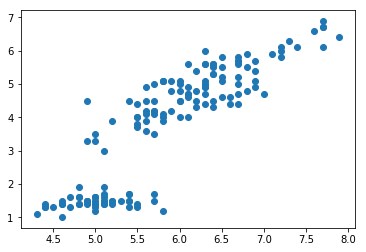

In [6]:
## アイリスデータ解析
# iris data 読み込み
iris=pd.read_csv(data_dir+'iris.csv')

# sepal length と petal length の相関係数 r と有意確率 p を求める
plt.scatter(iris.iloc[:,0], iris.iloc[:,2]) # 分布を見る
r,p = scipy.stats.pearsonr(iris.iloc[:,0], iris.iloc[:,2])
print(r)
print(p)

# 相関マップ
R = np.corrcoef([iris.iloc[:,0], iris.iloc[:,1],
                 iris.iloc[:,2], iris.iloc[:,3]])
print(R)


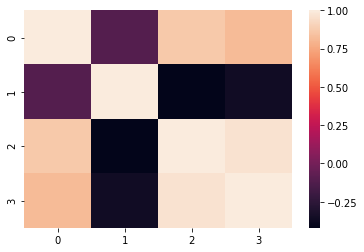

In [7]:
# 相関行列のヒートマップを描く
import seaborn as sns
sns.heatmap(R)
# グラフを表示する
plt.show()

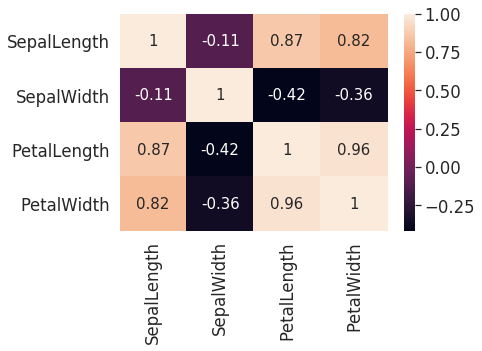

In [8]:
# もう少しわかりやすく相関行列のヒートマップを描く
import seaborn as sns
sns.set(font_scale=1.5) # フォントの大きさを調整
cr = ['SepalLength', 'SepalWidth', 
      'PetalLength','PetalWidth'] # 横軸と縦軸の意味
sns.heatmap(R, 
            annot=True, # マップの実際の値を表示する
            annot_kws={'size': 15}, # 値のフォントの大きさ
            xticklabels=cr, # 横軸の意味
            yticklabels=cr) # 縦軸の意味
# グラフを表示する
plt.show()

-0.10936924995064937
0.1827652152713699


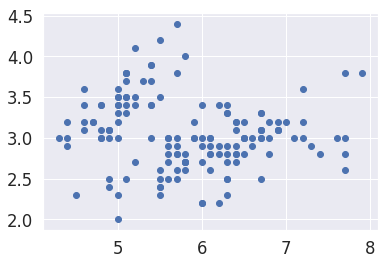

In [9]:
# sepal length と sepal width の相関係数 r と有意確率 p を求める
plt.scatter(iris.iloc[:,0], iris.iloc[:,1]) # 分布を見る
r,p = scipy.stats.pearsonr(iris.iloc[:,0], iris.iloc[:,1])
print(r)
print(p)


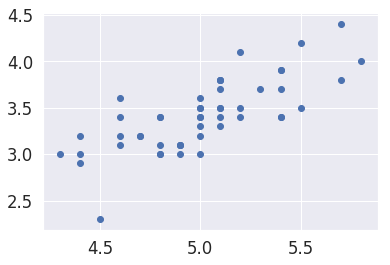

0.7467803732639269
4.751986580148901e-10


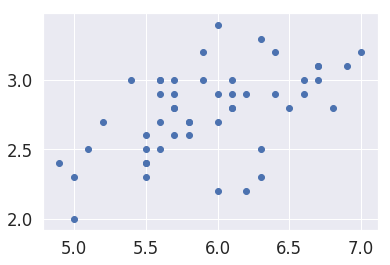

0.5259107172828247
8.771860011973821e-05


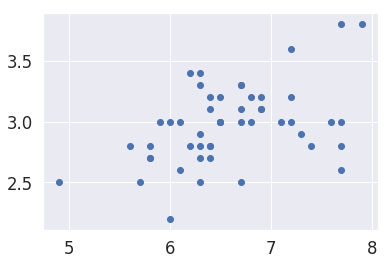

0.45722781639411314
0.000843462472370877


In [11]:
# class ごとに　sepal length と sepal width の相関係数 r と有意確率 p を求める
# classごとにデータを分ける
irisSetosa = iris[iris.iloc[:,4]=='Iris-setosa']
irisVersicolor = iris[iris.iloc[:,4]=='Iris-versicolor']
irisVirginica = iris[iris.iloc[:,4]=='Iris-virginica']

# setosa
plt.scatter(irisSetosa.iloc[:,0], irisSetosa.iloc[:,1]) # 分布を見る
plt.show()
r,p = scipy.stats.pearsonr(irisSetosa.iloc[:,0], irisSetosa.iloc[:,1])
print(r)
print(p)

# versicolor
plt.scatter(irisVersicolor.iloc[:,0], irisVersicolor.iloc[:,1]) # 分布を見る
plt.show()
r,p = scipy.stats.pearsonr(irisVersicolor.iloc[:,0], irisVersicolor.iloc[:,1])
print(r)
print(p)

# virginica
plt.scatter(irisVirginica.iloc[:,0], irisVirginica.iloc[:,1]) # 分布を見る
plt.show()
r,p = scipy.stats.pearsonr(irisVirginica.iloc[:,0], irisVirginica.iloc[:,1])
print(r)
print(p)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


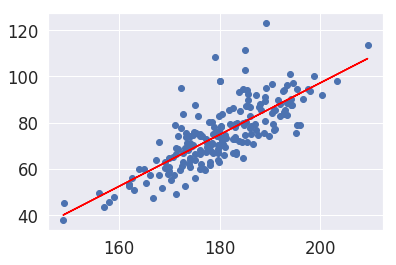

In [12]:
#######################################
# 回帰
from statsmodels import api as sm
import matplotlib.pyplot as plt
import pandas as pd

ais = pd.read_csv(data_dir+'ais.csv')
X = ais.Ht
X = sm.add_constant(X) #定数項を導入
Y = ais.Wt
model=sm.OLS(Y,X) #線形モデルを作成
result = model.fit() #線形モデルの係数を決定
result.summary()

plt.scatter(x=ais.Ht,y=ais.Wt) and plt.plot(ais.Ht, 
model.fit().predict(X),c="red")


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


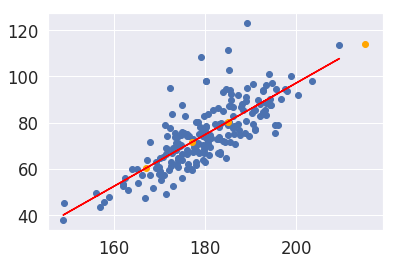

In [13]:
# 未知データ
unknown = [185, 167, 215, 177]
X2 = sm.add_constant(pd.DataFrame(unknown))
Wt2 = model.fit().predict(X2) ##線形モデルの係数を決定＋データX2に対して予測
plt.scatter(x=ais.Ht,y=ais.Wt) and plt.plot(ais.Ht, 
model.fit().predict(X),c="red") and plt.scatter(x=unknown,y=Wt2, c='orange')


In [14]:
##################
# 重回帰
# 例１：身長と体重からLBMを予測
X = ais[['Ht', 'Wt']]
X = sm.add_constant(X)
Y = ais.LBM
model=sm.OLS(Y,X)#線形モデルを作成
result = model.fit()#線形モデルの係数を決定
result.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LBM   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     737.1
Date:                Tue, 13 Aug 2019   Prob (F-statistic):           9.85e-93
Time:                        02:41:12   Log-Likelihood:                -590.29
No. Observations:                 202   AIC:                             1187.
Df Residuals:                     199   BIC:                             1196.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.6586      7.519     -4.875      0.000     -51.486     -21.831
Ht             0.2587      0.053      4.922      0.000       0.155       0.362
Wt             0.7325      0.037     19.941      0.000       0.660       0.805
==============================================================================
Omnibus:                       22.720   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.767
Skew:                          -0.862   Prob(JB):                     1.54e-06
Kurtosis:                       3.458   Cond. No.                     4.61e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

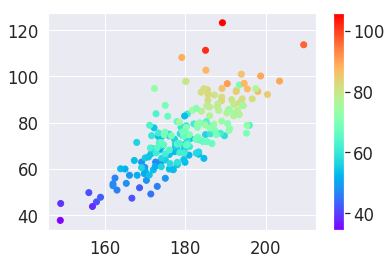

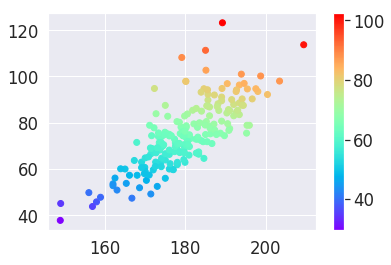

In [15]:
# 実際の可視化
plt.scatter(x=X.Ht, y=X.Wt, c=Y,
            cmap='rainbow') and plt.colorbar()
plt.show()
# 予測の可視化
H = X.Ht
plt.scatter(x=X.Ht, y=X.Wt, c=model.fit().predict(X),
            cmap='rainbow')  and plt.colorbar()
plt.show()

In [16]:
# 例２：
# ワインの品質データ
from statsmodels import api as sm
import matplotlib.pyplot as plt
wine_data = pd.read_csv(data_dir+"winequality-red.csv", sep=";")
X = wine_data.drop("quality", axis=1)
X = sm.add_constant(X)
Y = wine_data['quality']#Yとしてqualityを取り出す
model = sm.OLS(Y, X)#線形モデルの定義
result = model.fit()#線形モデルの係数を決定
result.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Tue, 13 Aug 2019   Prob (F-statistic):          1.79e-145
Time:                        02:41:53   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.9652     21.195      1.036      0.300     -19.607      63.538
fixed acidity            0.0250      0.026      0.963      0.336      -0.026       0.076
volatile acidity        -1.0836      0.121     -8.948      0.000      -1.321      -0.846
citric acid             -0.1826      0.147     -1.240      0.215      -0.471       0.106
residual sugar           0.0163      0.015      1.089      0.276      -0.013       0.046
chlorides               -1.8742      0.419     -4.470      0.000      -2.697      -1.052
free sulfur dioxide      0.0044      0.002      2.009      0.045       0.000       0.009
total sulfur dioxide    -0.0033      0.001     -4.480      0.000      -0.005      -0.002
density                -17.8812     21.633     -0.827      0.409     -60.314      24.551
pH                      -0.4137      0.192     -2.159      0.031      -0.789      -0.038
sulphates                0.9163      0.114      8.014      0.000       0.692       1.141
alcohol                  0.2762      0.026     10.429      0.000       0.224       0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""